In [1]:
# 한글 깨짐 방지

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주도에는 여성의 비율이 더 높을까?


지역을 입력하시오.   :제주특별자치도
[-2387, -2697, -3030, -3308, -3277, -3291, -3751, -3690, -3736, -3523, -3535, -3847, -3594, -3480, -3548, -3779, -3716, -4075, -4525, -4367, -4384, -4643, -4590, -4620, -4664, -4464, -4501, -4068, -3725, -3476, -3314, -3507, -3597, -3858, -3949, -4515, -5208, -5398, -5462, -5495, -4751, -5222, -5186, -5464, -6212, -6094, -6458, -6827, -6472, -6429, -6305, -5862, -5978, -5683, -5442, -5665, -5471, -5403, -5601, -5165, -4710, -4508, -4296, -4201, -3655, -2722, -3002, -2536, -2518, -2334, -2697, -2531, -2264, -1965, -1933, -1779, -1919, -1755, -1468, -1439, -1274, -1103, -935, -870, -775, -650, -452, -333, -231, -205, -123, -73, -63, -35, -31, -39, -39, -15, -16, -8, -27]
[2244, 2550, 2821, 3004, 3159, 3192, 3675, 3415, 3494, 3273, 3350, 3655, 3270, 3037, 3194, 3397, 3217, 3701, 4264, 3995, 3999, 4074, 4089, 4124, 4011, 4058, 3881, 3790, 3371, 3223, 3245, 3273, 3410, 3711, 3936, 4441, 5121, 5234, 5131, 5510, 4560, 4971, 4697, 5009, 5435, 5740, 5953, 6244, 5916, 5750,

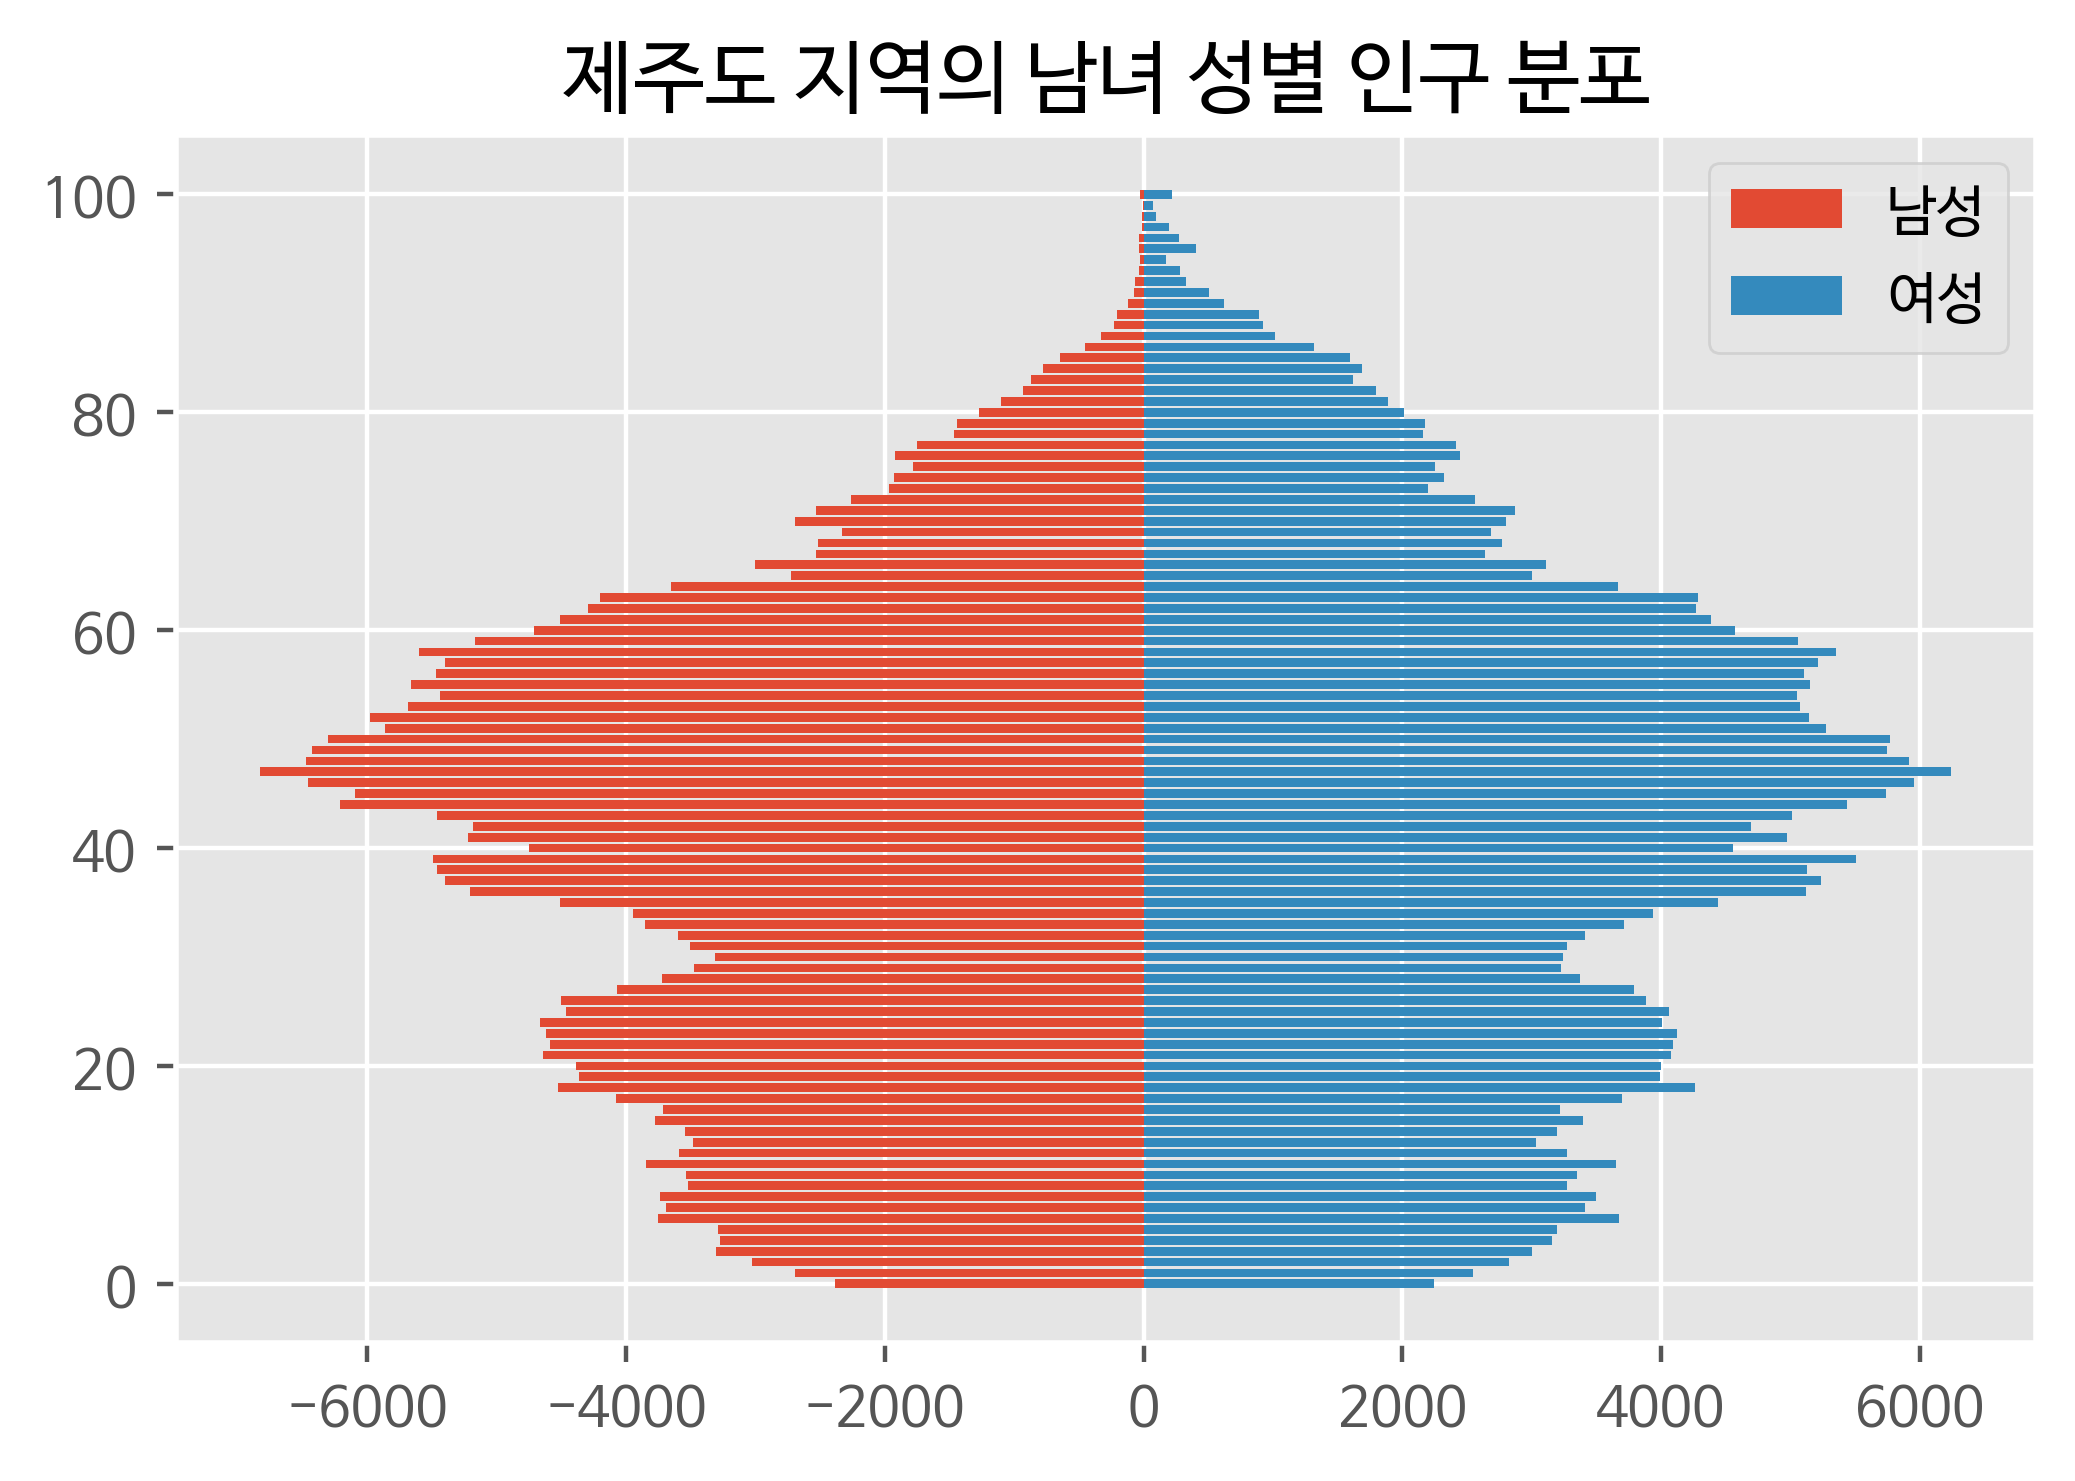

In [30]:

import csv
import matplotlib.pyplot as plt


f = open('/content/gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

name = input('지역을 입력하시오.   :')

m = []
f = []



for row in data:
  if name in row[0]:
    for i in row[3:104]:
      m.append(-(int(i.replace(',', ''))))
    for j in row[106:]:
      f.append(int(j.replace(',', '')))
    break

f.reverse
# 0세부터 인구수 나올 수 있도록 데이터 뒤집기

print(m)
print(f)

plt.figure(dpi=200)
plt.style.use('ggplot')  # 격자무늬 스타일로 지정  classic, dark_background, ggplot
plt.rcParams['axes.unicode_minus'] = False # x축의 마이너스 ticks를 알려준다. 
plt.barh(range(101), m, label='남성')
plt.barh(range(101), f, label='여성')
plt.legend()
plt.title('제주도 지역의 남녀 성별 인구 분포')
plt.show()

# 제주특별자치도 데이터 확인 -> 101개 이어야 하는데 4646개
# 제주도에 포함된 지역 이름이 총 46건임 
 

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/age_gender2019_02.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)

name = input('찾고 싶은 지역명을 입력해주세요 :')

m = []
fe = []

for row in data:
  if name in row[0]:
    for i in row[3:104] :  # 남성 데이터 컬럼 3~103 개의 데이터를 슬라이싱 - 정수 데이터로 변환 -> m리스트에 저장
      m.append(-(int(i.replace(',',''))))  # 항아리 차트를 그리기 위해 음수로 변환 시키는 작업을 먼저 해준다.
    for j in row[106:] :  # 여성 데이터 : 106~ 끝까지 데이터 슬라이싱 -> 정수 데이터로 변환 -> fe리스트에 저장
      fe.append(int(j.replace(',','')))
    break  # 첫번째 데이터만 확인하고 탈출하기 위해서

# 시각화 설정
plt.figure(dpi = 200)
plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.title(name+'지역의 남녀 성별 인구 분포')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.barh(range(101),m, label='남성')
plt.barh(range(101),fe, label='여성')
plt.legend()
plt.show()

항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie


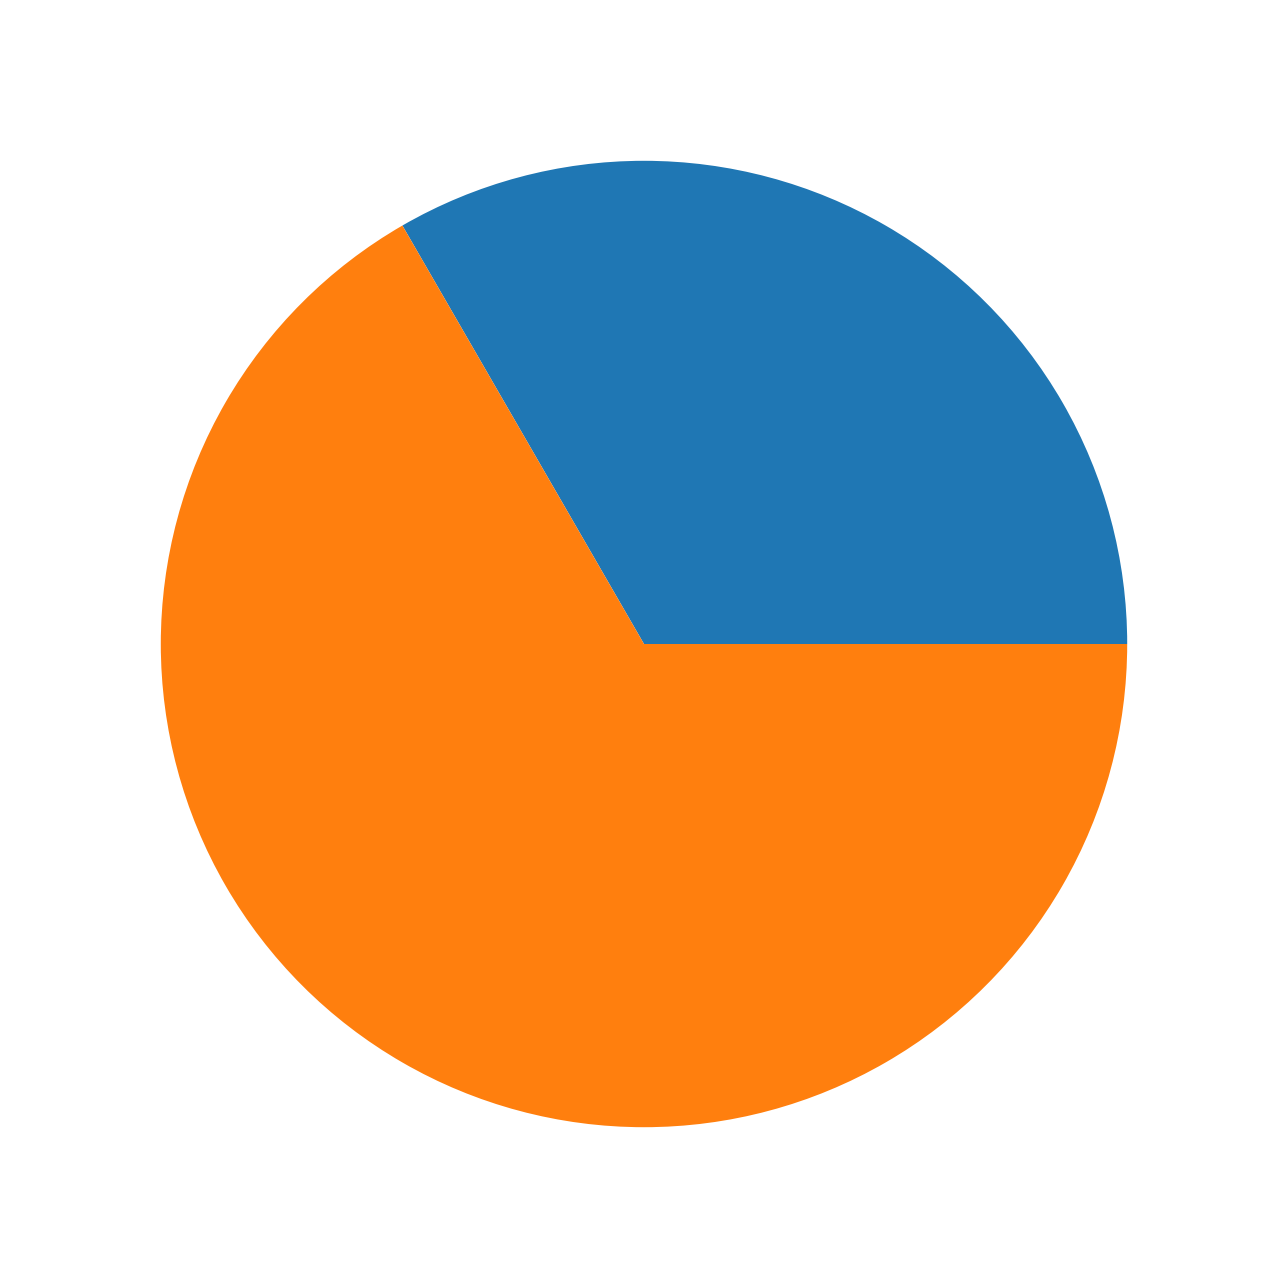

In [12]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.pie([10, 20])
plt.show()

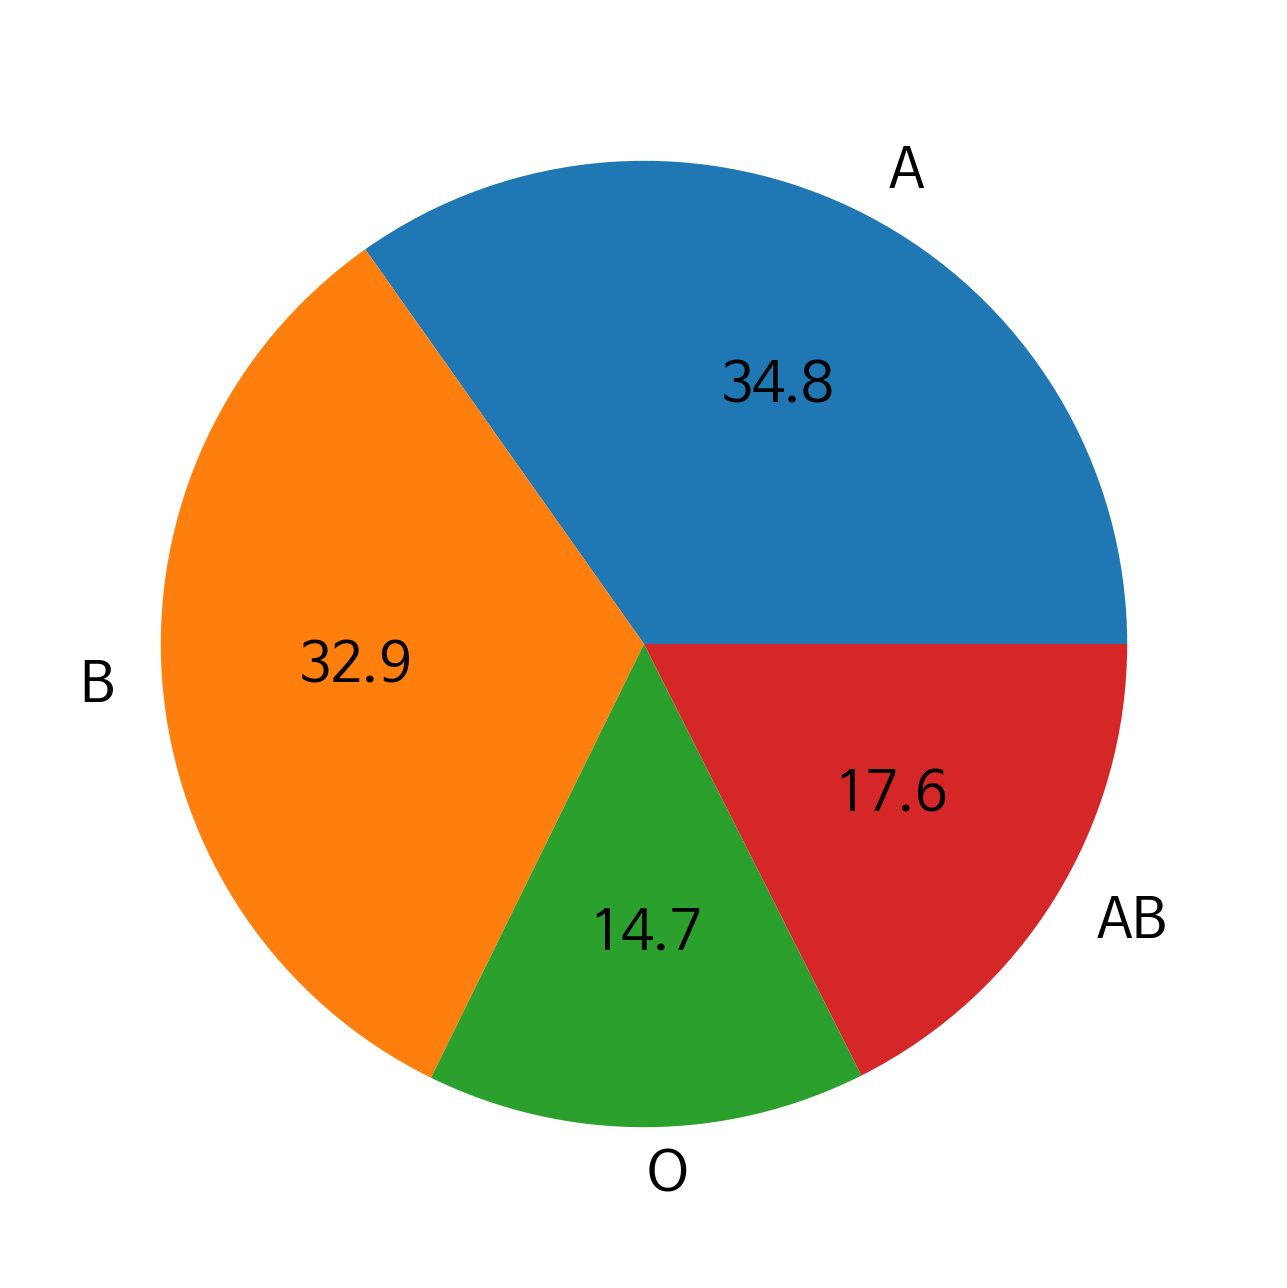

In [23]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'O형', 'AB형']


plt.pie(size, labels=label, autopct='%.1f') # autopct는 퍼센트를 출력해준다. (총 합은 100%이다.)
plt.show()

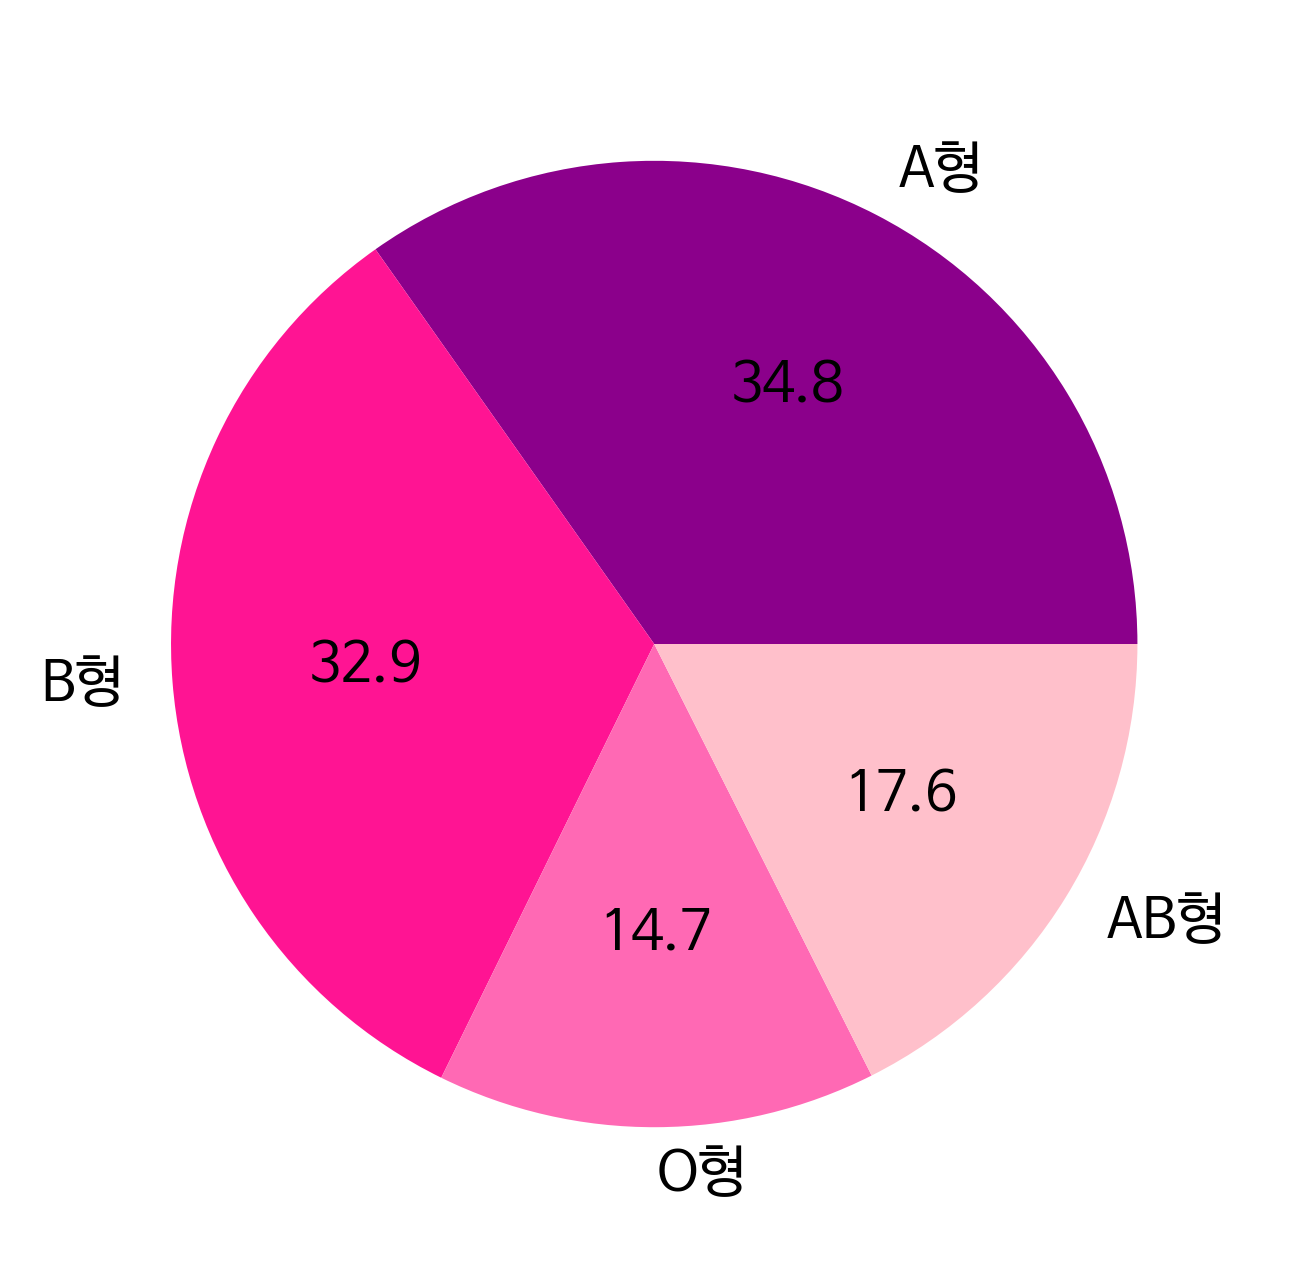

In [34]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'O형', 'AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']


plt.pie(size, labels=label, autopct='%.1f', colors = color)
plt.show()

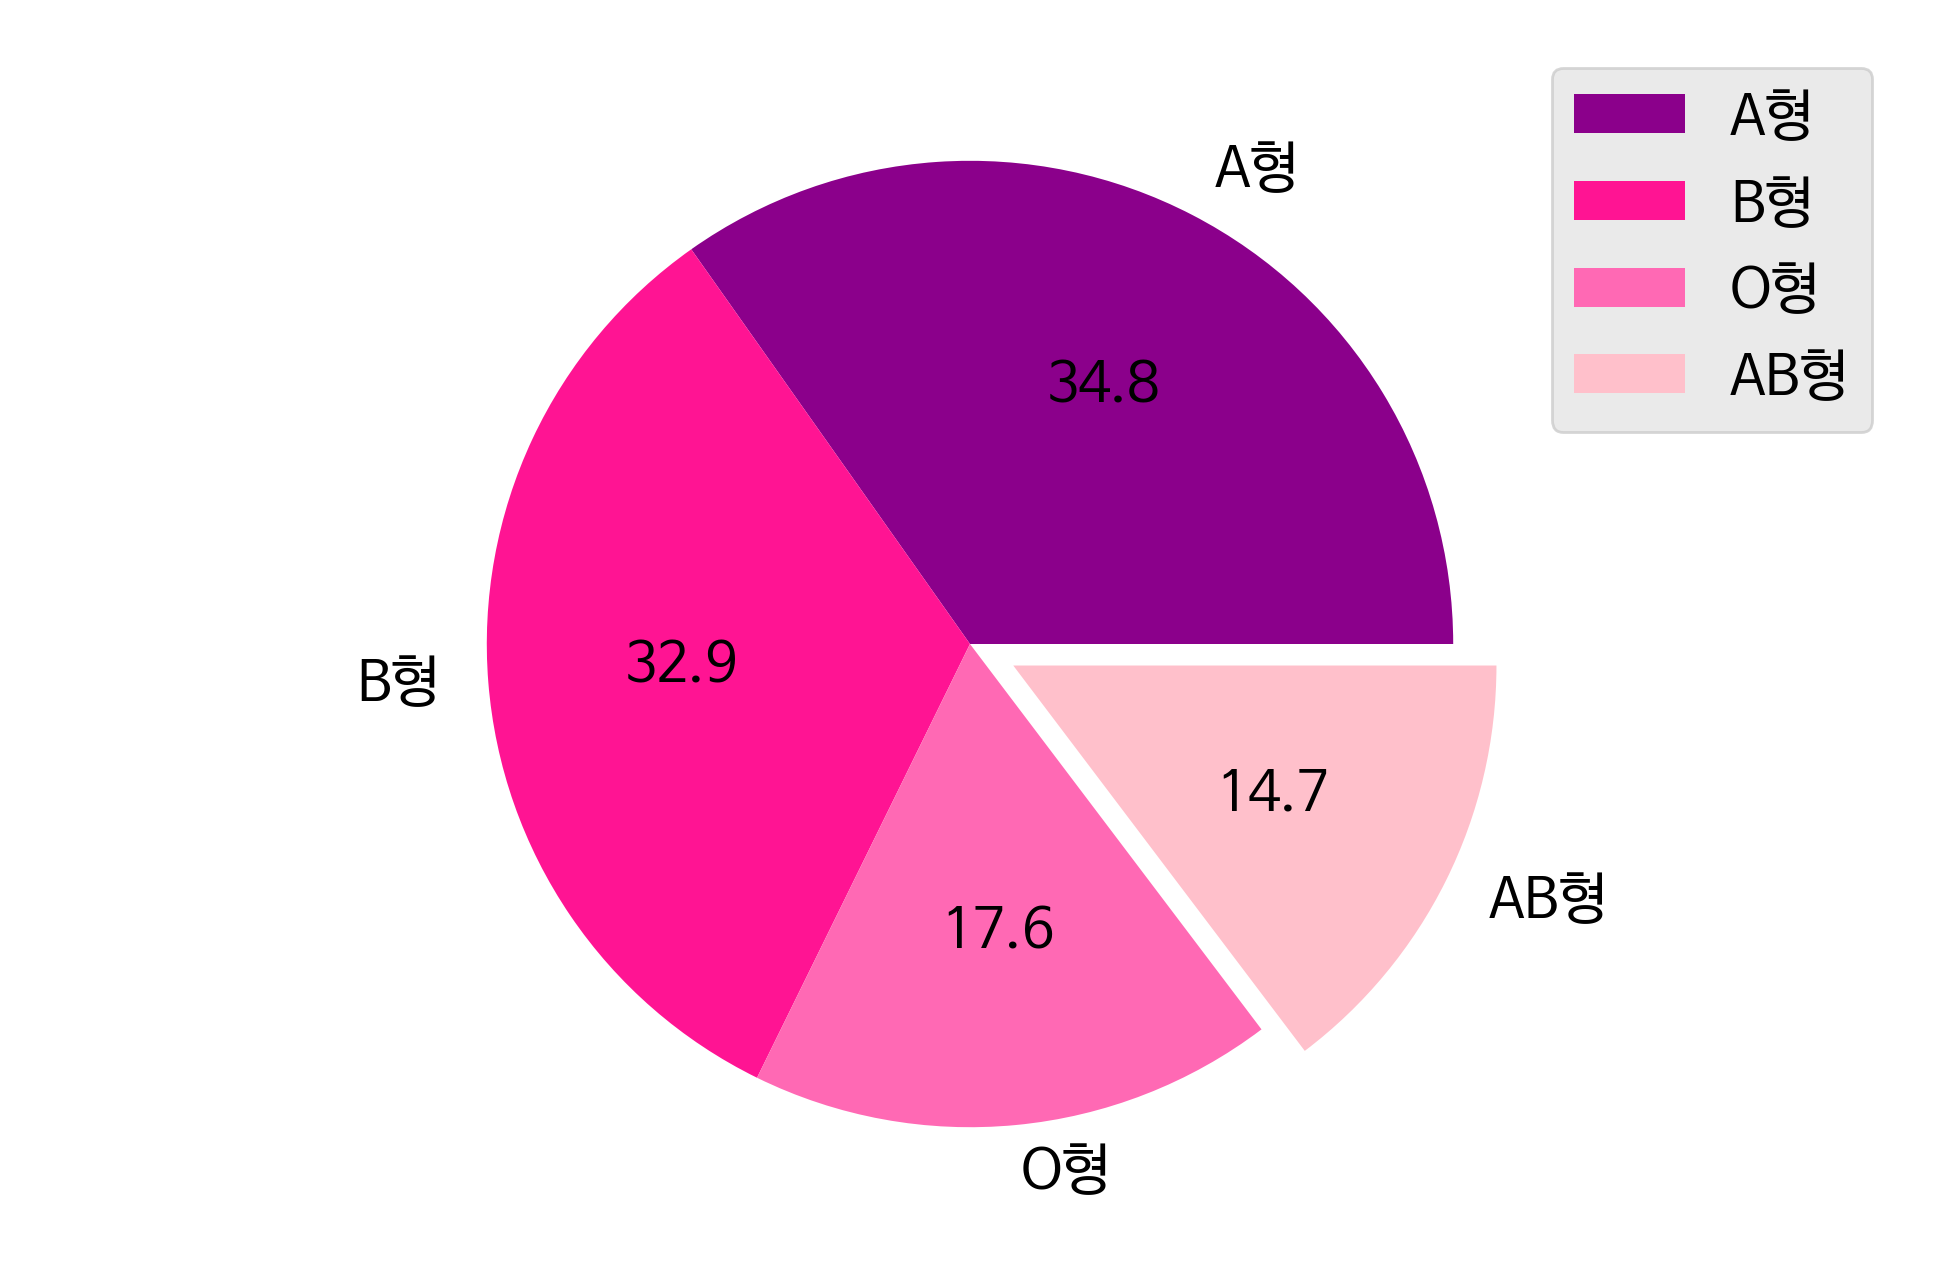

In [38]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
size = [2441, 2312, 1233, 1031]
label = ['A형', 'B형', 'O형', 'AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f',explode=(0,0,0,0.1) , colors = color)
plt.legend()
plt.show()

https://matplotlib.org/gallery/color/named_colors.html
* 맷플롯립에서 사용할 수 있는 컬러

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
size = [2441, 2312, 1233, 1031]
label = ['A형', 'B형', 'O형', 'AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f',explode=(0,0,0,0.1) , colors = color)
plt.legend()
plt.show()

제주도의 성별 인구 비율 표현하기

지역을 입력하시오.   :제주특별자치도


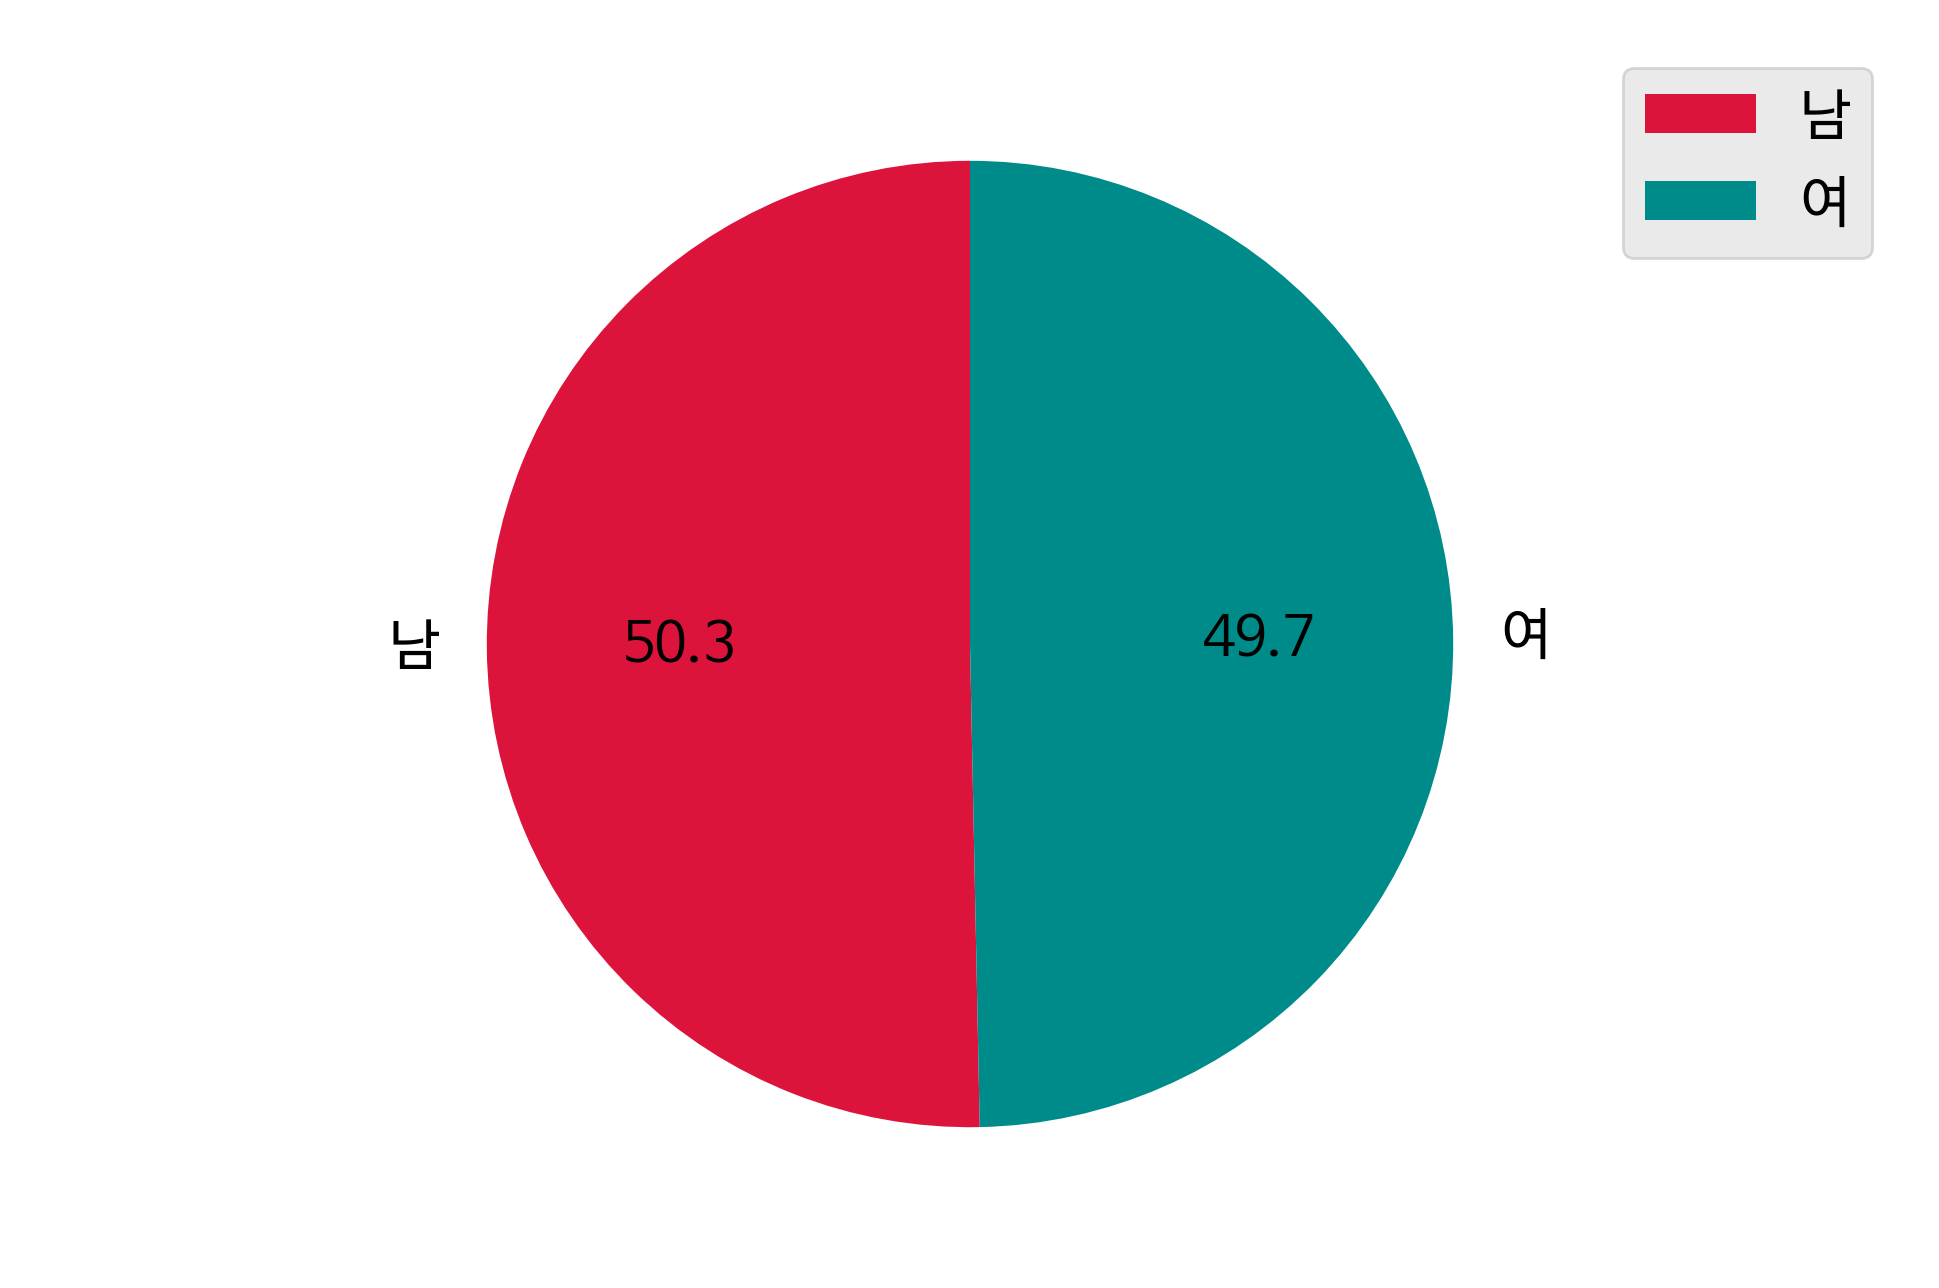

In [44]:
import csv
import matplotlib.pyplot as plt


f = open('/content/gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)


size = [] # 제주도의 남성 인구 합계, 여성 인구 합계


name = input('지역을 입력하시오.   :')




for row in data:
  if name in row[0]:
    m = 0 # 남성 인구수 합계 변수
    f = 0 # 여성 인구수 합계 변수
    for i in range(101):
      m += int(row[3+i].replace(',', '')) 
      f += int(row[106+i].replace(',', ''))
    break

size.append(m)
size.append(f)

# 파이차트 시각화
plt.figure(dpi=200)
color = ['crimson', 'darkcyan']
label = ['남', '여']
plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f',explode=(0,0) , colors = color, startangle=90)
plt.legend()

plt.show()
